In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH="/mnt/Archivos/dataset-xray"

In [3]:
from pathlib import Path
from covidframe.tools.load import load_database

In [4]:
base_dir = Path(BASE_PATH)
DEFAULT_DATABASE_NAME_TRAIN = "database_clean_balanced_train.metadata.csv"
DEFAULT_DATABASE_NAME_TEST = "database_clean_balanced_test.metadata.csv"

In [5]:
df_train = load_database(filename= base_dir / DEFAULT_DATABASE_NAME_TRAIN)
df_test = load_database(filename= base_dir / DEFAULT_DATABASE_NAME_TEST)

In [6]:
from covidframe.tools.image import load_image

In [7]:
df_train["vector"]= df_train["image_path"].apply(lambda x: load_image(x))

In [8]:
df_train["vector"]

0       [[58, 74, 67, 51, 35, 21, 15, 10, 8, 9, 9, 7, ...
1       [[11, 25, 27, 26, 26, 27, 27, 26, 26, 26, 26, ...
2       [[165, 157, 148, 142, 136, 130, 125, 120, 118,...
3       [[99, 86, 72, 59, 48, 39, 33, 28, 26, 28, 32, ...
4       [[217, 216, 215, 215, 217, 219, 218, 217, 218,...
                              ...                        
9727    [[175, 175, 177, 181, 187, 185, 165, 136, 116,...
9728    [[5, 3, 2, 3, 4, 3, 3, 4, 2, 4, 5, 2, 1, 3, 4,...
9729    [[35, 36, 35, 34, 34, 35, 36, 35, 35, 35, 35, ...
9730    [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
9731    [[88, 57, 34, 20, 8, 1, 0, 0, 0, 0, 0, 0, 0, 0...
Name: vector, Length: 9732, dtype: object

In [9]:
import numpy as np

In [10]:
df_train["size"] = df_train["vector"].apply(lambda x: x.shape)

In [11]:
df_train["size"]

0         (299, 299)
1         (299, 299)
2         (299, 299)
3         (299, 299)
4         (299, 299)
            ...     
9727      (299, 299)
9728    (2000, 2000)
9729      (299, 299)
9730      (299, 299)
9731      (299, 299)
Name: size, Length: 9732, dtype: object

In [12]:
df_train["size"].mode

<bound method Series.mode of 0         (299, 299)
1         (299, 299)
2         (299, 299)
3         (299, 299)
4         (299, 299)
            ...     
9727      (299, 299)
9728    (2000, 2000)
9729      (299, 299)
9730      (299, 299)
9731      (299, 299)
Name: size, Length: 9732, dtype: object>

In [13]:
df_train["is_squared"] = df_train["size"].apply(lambda x:  x[0]==x[1])

In [14]:
df_train['is_squared'] = df_train['is_squared'].astype('category')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

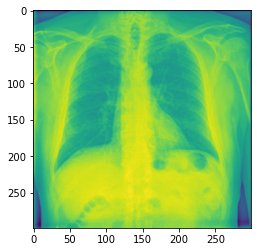

In [20]:
plt.imshow(df_train["vector"].iloc[0])

<AxesSubplot:xlabel='Count', ylabel='is_squared'>

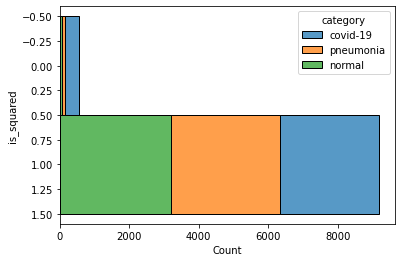

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.histplot(data=df_train, ax=ax,y="is_squared", hue="category",multiple="stack")

In [22]:
df_train['aspect_ratio'] = df_train["size"].apply(lambda x:  x[1]/x[0])

<AxesSubplot:xlabel='aspect_ratio', ylabel='Count'>

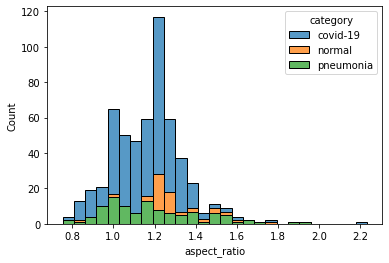

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.histplot(data=df_train[df_train["aspect_ratio"]!=1], ax=ax,x="aspect_ratio", hue="category",multiple="stack")

In [24]:
test_image = df_train["vector"].iloc[0]

In [25]:
test_image.shape[0]

299

In [26]:
from covidframe.tools.image import crop_image

In [27]:
n_image = crop_image(test_image, (200,200))

In [28]:
n_image.shape

(200, 200)

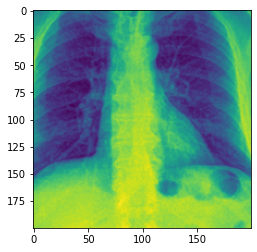

In [29]:
plt.imshow(n_image)

In [30]:
from covidframe.tools.image import to_equal_aspect_ratio

In [31]:
eq_aspect = to_equal_aspect_ratio(test_image)

In [32]:
eq_aspect.shape

(299, 299)

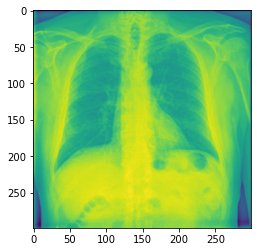

In [33]:
plt.imshow(eq_aspect)

In [34]:
element = df_train[df_train["aspect_ratio"]>1.2].iloc[0]

In [35]:
nq_image = element["vector"]

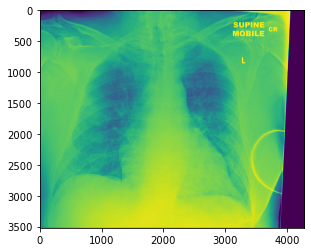

In [36]:
plt.imshow(nq_image)

In [37]:
nq_image.shape

(3520, 4280)

In [38]:
n_image = to_equal_aspect_ratio(nq_image)

In [39]:
n_image.shape

(3520, 3520)

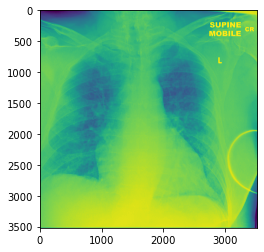

In [40]:
plt.imshow(n_image)

In [41]:
from covidframe.tools.image import resize_image

In [42]:
r_image = resize_image(n_image,(299,299))

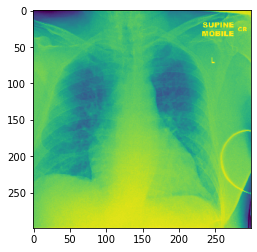

In [43]:
plt.imshow(r_image)

In [44]:
r_image.shape

(299, 299)

In [45]:
interpolations = ["linear", "area", "nearest", "cubic"]

In [46]:
images = [resize_image(n_image,(299,299), interpolation) for interpolation in interpolations]

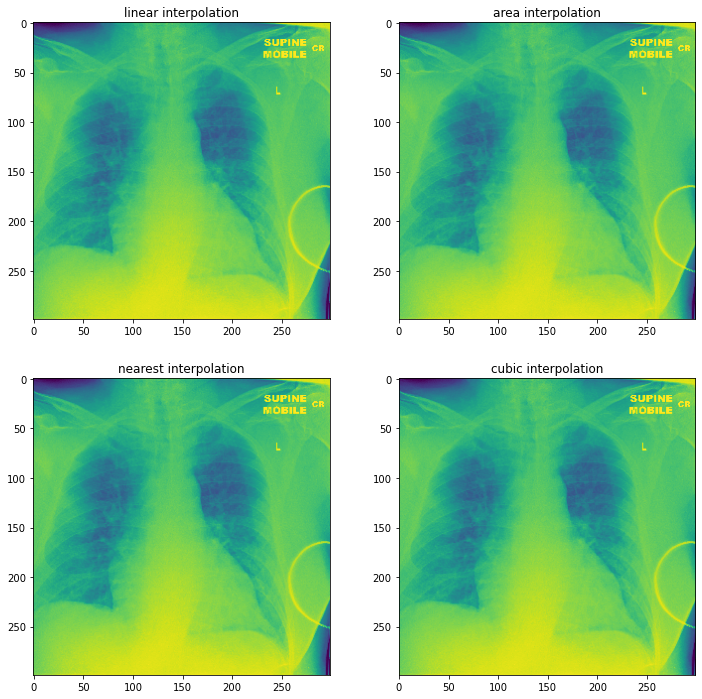

In [47]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(ncols=2,nrows=2)

for ax, image, interpolation in zip(axes.ravel(), images, interpolations):
    ax.imshow(image)
    ax.set_title(f"{interpolation} interpolation")

In [48]:
from covidframe.plot.image import plot_histogram

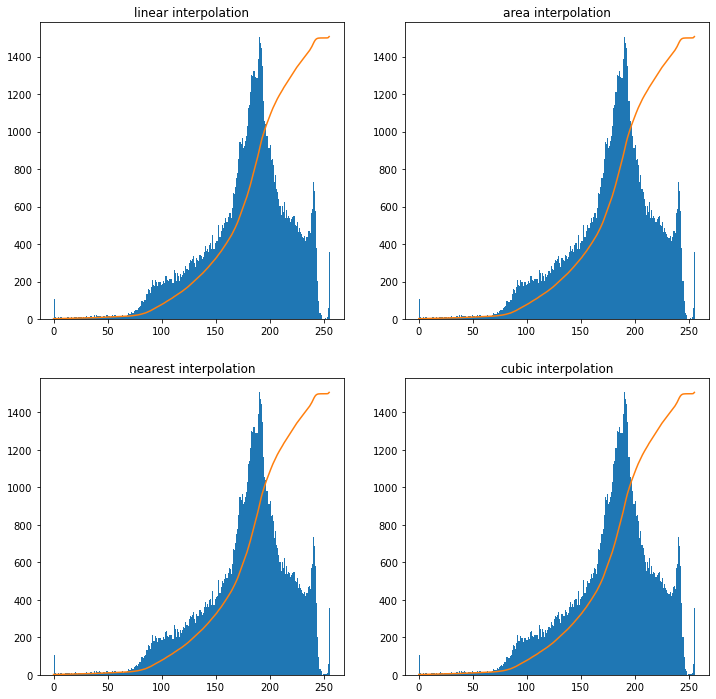

In [49]:
fig = plt.figure(figsize=(12,12))
axes = fig.subplots(ncols=2,nrows=2)

for ax, image, interpolation in zip(axes.ravel(), images, interpolations):
    plot_histogram(image, ax=ax)
    ax.set_title(f"{interpolation} interpolation")

In [50]:
NEW_SIZE = (299,299)

In [51]:
df_train["resized"] = df_train["vector"].apply(lambda x: resize_image(to_equal_aspect_ratio(x), NEW_SIZE))

In [52]:
df_train["new_size"] = df_train["resized"].apply(lambda x: x.shape)

In [53]:
df_train["new_size"].unique()

array([(299, 299)], dtype=object)

In [54]:
np.stack(df_train["resized"]).shape

(9732, 299, 299)

In [55]:
from covidframe.integrate import process_images_in_df, load_images_in_df, describe_images_in_df

In [56]:
n_df_test = process_images_in_df(df_test, NEW_SIZE)

Loading images into dataframe
Describing images
Resizing images in dataframe


In [57]:
df_train["is_squared"] = df_train["is_squared"].astype("bool")

In [58]:
n_df_test["is_squared"] = n_df_test["is_squared"].astype("bool")

In [59]:
IMAGE_DF_TRAIN_NAME = "database_balanced_train.h5"
IMAGE_DF_TEST_NAME = "database_balanced_test.h5"

In [60]:
from covidframe.tools.save import save_database_to_hdf

In [61]:
save_database_to_hdf(df_train.drop(columns="vector"), base_dir / IMAGE_DF_TRAIN_NAME)

/home/luighi/.local/lib/python3.9/site-packages/pandas/core/generic.py:2703: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['image_path', 'image_name', 'original_category', 'id', 'type', 'source',
       'folder_name', 'im_hash', 'original_image_path', 'original_image_name',
       'category', 'size', 'resized', 'new_size'],
      dtype='object')]

  pytables.to_hdf(


In [62]:
save_database_to_hdf(n_df_test.drop(columns="vector"), base_dir / IMAGE_DF_TEST_NAME)